In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_recall_curve,
    roc_curve,
    auc,
    confusion_matrix,
    classification_report,
    log_loss,
)


In [7]:
# 🔹 Load Data
df = pd.read_csv("IotFinalDataset.csv")
X = df.drop(columns=["Label"])  # Features
y = df["Label"]  # Target

In [8]:
# 🔹 Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:
# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [10]:
# 🔹 Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# 🔹 One-Hot Encode y
encoder = OneHotEncoder(sparse_output=False)
y_train_bin = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_bin = encoder.transform(y_test.reshape(-1, 1))

In [14]:
# 🔹 Train Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# 🔹 Predictions
y_pred = dt.predict(X_test_scaled)
y_prob = dt.predict_proba(X_test_scaled)

# 🔹 Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9989


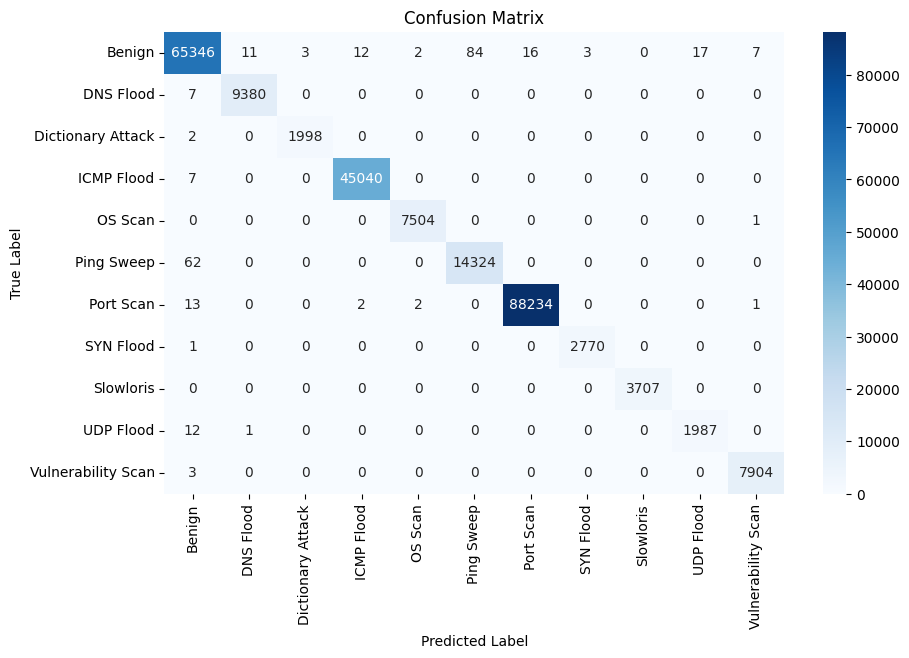

In [16]:
# 🔹 Confusion Matrix 📊
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Log Loss: 0.0390


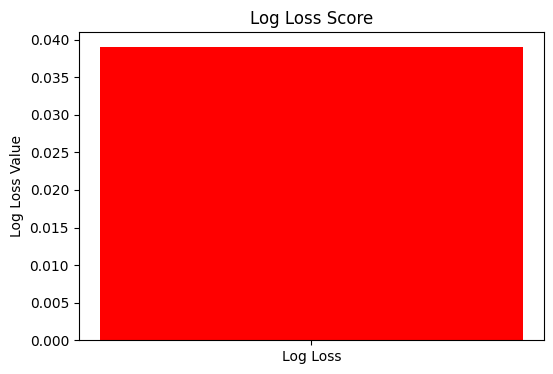

In [17]:
# 🔹 Log Loss Calculation
logloss = log_loss(y_test_bin, y_prob)
print(f"Log Loss: {logloss:.4f}")

# 📊 Log Loss Bar Plot
plt.figure(figsize=(6, 4))
plt.bar(["Log Loss"], [logloss], color="red")
plt.ylabel("Log Loss Value")
plt.title("Log Loss Score")
plt.show()

C:\Users\emada\AppData\Local\Temp\ipykernel_18032\4156605867.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(label_encoder.classes_))  # Get unique colors


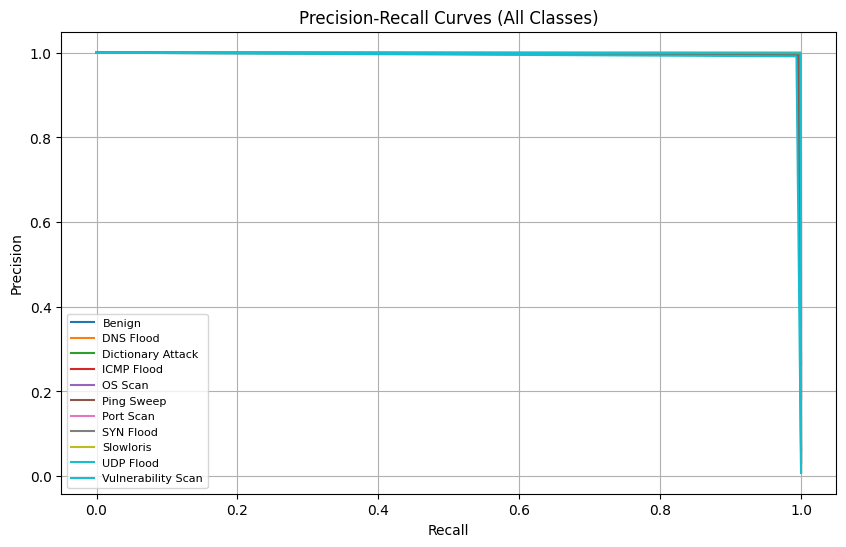

In [18]:
# 🔹 Precision-Recall Curves (All Classes in One Graph)
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap("tab10", len(label_encoder.classes_))  # Get unique colors

for i, class_name in enumerate(label_encoder.classes_):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(recall, precision, label=f"{class_name}", color=colors(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves (All Classes)")
plt.legend(loc="best", fontsize=8)
plt.grid()
plt.show()

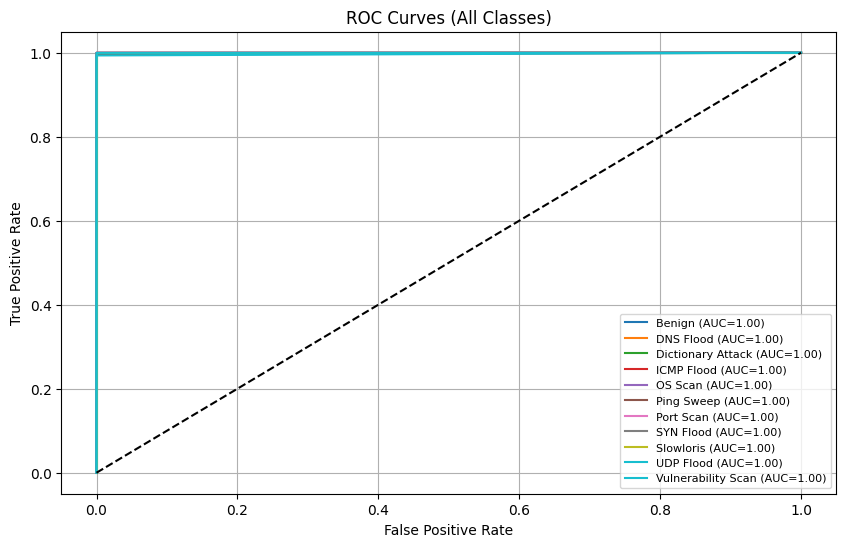

In [19]:
# 🔹 ROC Curves (All Classes in One Graph)
plt.figure(figsize=(10, 6))

for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC={roc_auc:.2f})", color=colors(i))

plt.plot([0, 1], [0, 1], linestyle="--", color="black")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (All Classes)")
plt.legend(loc="best", fontsize=8)
plt.grid()
plt.show()

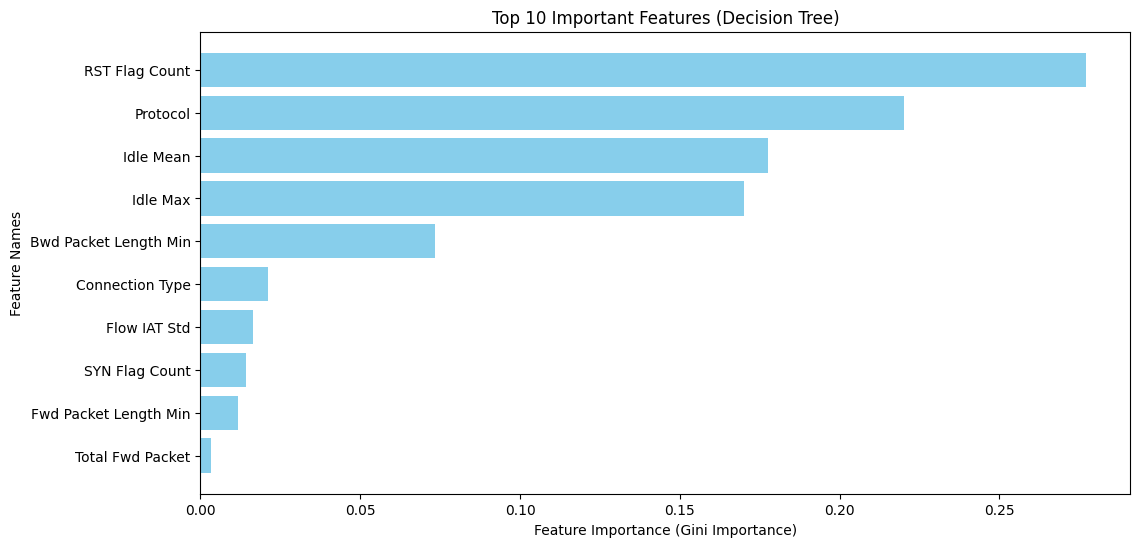

In [20]:
# 🔹 Feature Importance Visualization 📊
feature_importance = dt.feature_importances_
feature_names = np.array(X.columns)

# Sort by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# 📊 Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(sorted_features[:10], sorted_importance[:10], color="skyblue")
plt.xlabel("Feature Importance (Gini Importance)")
plt.ylabel("Feature Names")
plt.title("Top 10 Important Features (Decision Tree)")
plt.gca().invert_yaxis()
plt.show()